In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#import dataset for analysis
diamonds= pd.read_csv("diamonds.csv")

#first look on the data
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53937 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,NaN,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,NaN,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,NaN,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
#Unnamed:0 column can be removed (irrelevant)
diamonds= diamonds.drop("Unnamed: 0", axis = 1)

In [9]:
#missing values in carat column - the whole lines with data to be dropped (really minor number of items)
diamondsNonNA=diamonds.dropna(axis=0)
diamondsNonNA.isnull().sum()

#diamonds['carat']=diamonds['carat'].fillna(diamonds['carat'].mean())
#that might has been also used instead of removing rows with n/a


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
#data verification to get some observations
diamondsNonNA.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53


In [11]:
diamondsNonNA.describe()

,carat,depth,table,price,x,y,z
count,53937.000000,53937.000000,53937.00000,53937.000000,53937.000000,53937.000000,53937.000000
mean,0.797970,61.749471,57.45708,3933.000148,5.731247,5.734615,3.538792
std,0.474007,1.432493,2.23429,3989.460163,1.121726,1.142103,0.705674
min,0.200000,43.000000,43.00000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.00000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.00000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.00000,5325.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.00000,18823.000000,10.740000,58.900000,31.800000


In [12]:
#for rows with x=0 or y=0 or z=0 the data does not make sense - only 20 rows impacted
diamondsNonNA[(diamondsNonNA['x']==0) | (diamondsNonNA['y']==0) | (diamondsNonNA['z']==0)].count()

carat      20
cut        20
color      20
clarity    20
depth      20
table      20
price      20
x          20
y          20
z          20
dtype: int64

In [13]:
#removal of rows in which x=0 or y=0 or z=0
diamondsNonNA= diamondsNonNA.drop(diamondsNonNA[(diamondsNonNA['x']==0) | (diamondsNonNA['y']==0) | (diamondsNonNA['z']==0)].index)
diamondsNonNA.describe()

,carat,depth,table,price,x,y,z
count,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000
mean,0.797728,61.749580,57.456730,3931.193631,5.731717,5.734976,3.540104
std,0.473791,1.432203,2.233864,3987.300860,1.119388,1.140094,0.702505
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


[Text(0.5, 1.0, 'Heatmap of Diamonds Data - Pearson Correlations')]

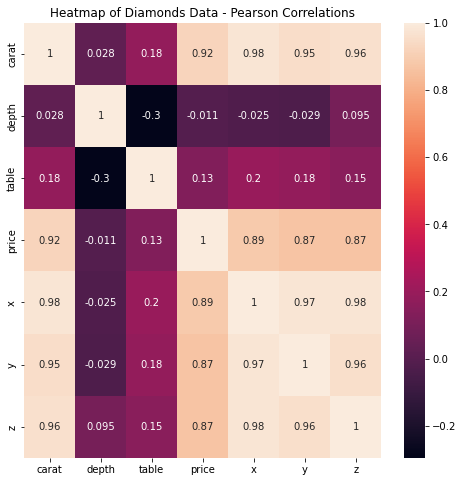

In [14]:
#checking relations between variables - the biggest suprise: correlation between depth and price and the others (depth is caluclated based on x,y and z)
correlations= diamondsNonNA.corr()
plt.subplots(figsize = (8, 8))
sns.heatmap(correlations, annot=True).set(title='Heatmap of Diamonds Data - Pearson Correlations')

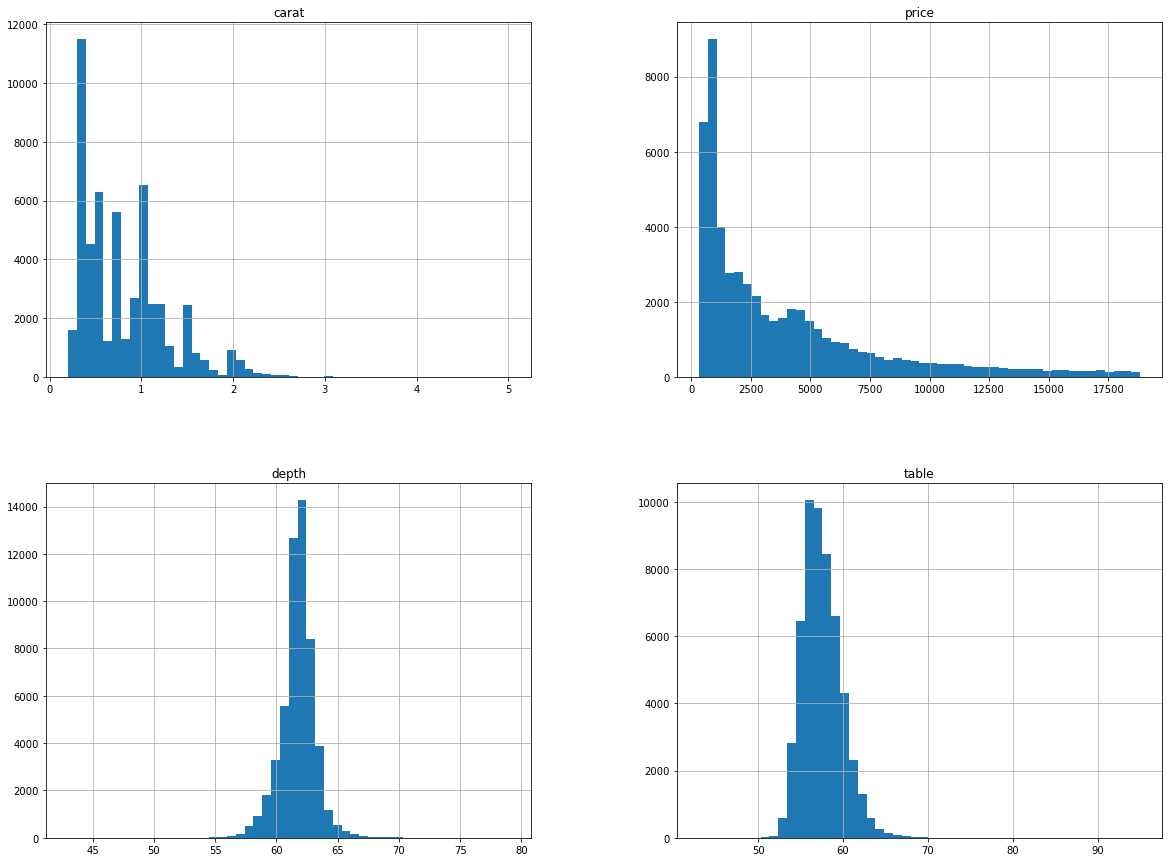

In [15]:
#histogram - few observations: in the dataset: more diamonds with lower carat and lower price
diamondsNonNA.hist(bins = 50, figsize = (20, 15),column=['carat','price','depth','table'])
plt.show()

In [16]:
#checking how many diamonds we have in each cut type
#the most diamonds with perfect cut which might be inconsistent with price histogram results (important: carat&price corr)
diamondsNonNA['cut'].value_counts()

Ideal        21547
Premium      13780
Very Good    12081
Good          4900
Fair          1609
Name: cut, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='clarity'>

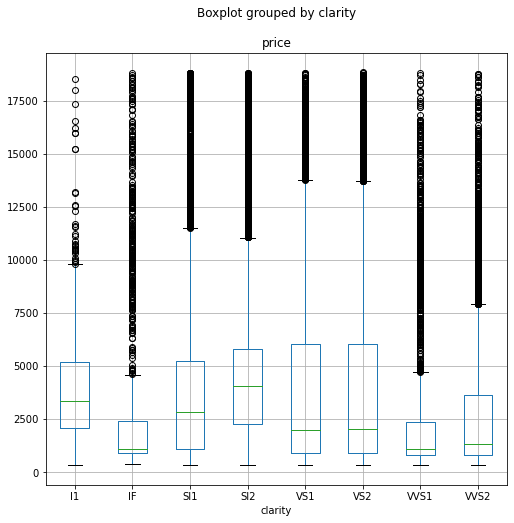

In [17]:
diamondsNonNA.boxplot(column="price",
                 by= "clarity",
                 figsize= (8,8))

<AxesSubplot:title={'center':'carat'}, xlabel='clarity'>

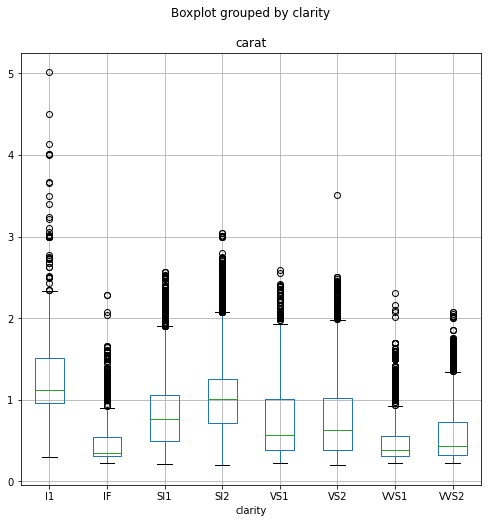

In [18]:
diamondsNonNA.boxplot(column="carat",
                 by= "clarity",
                 figsize= (8,8))

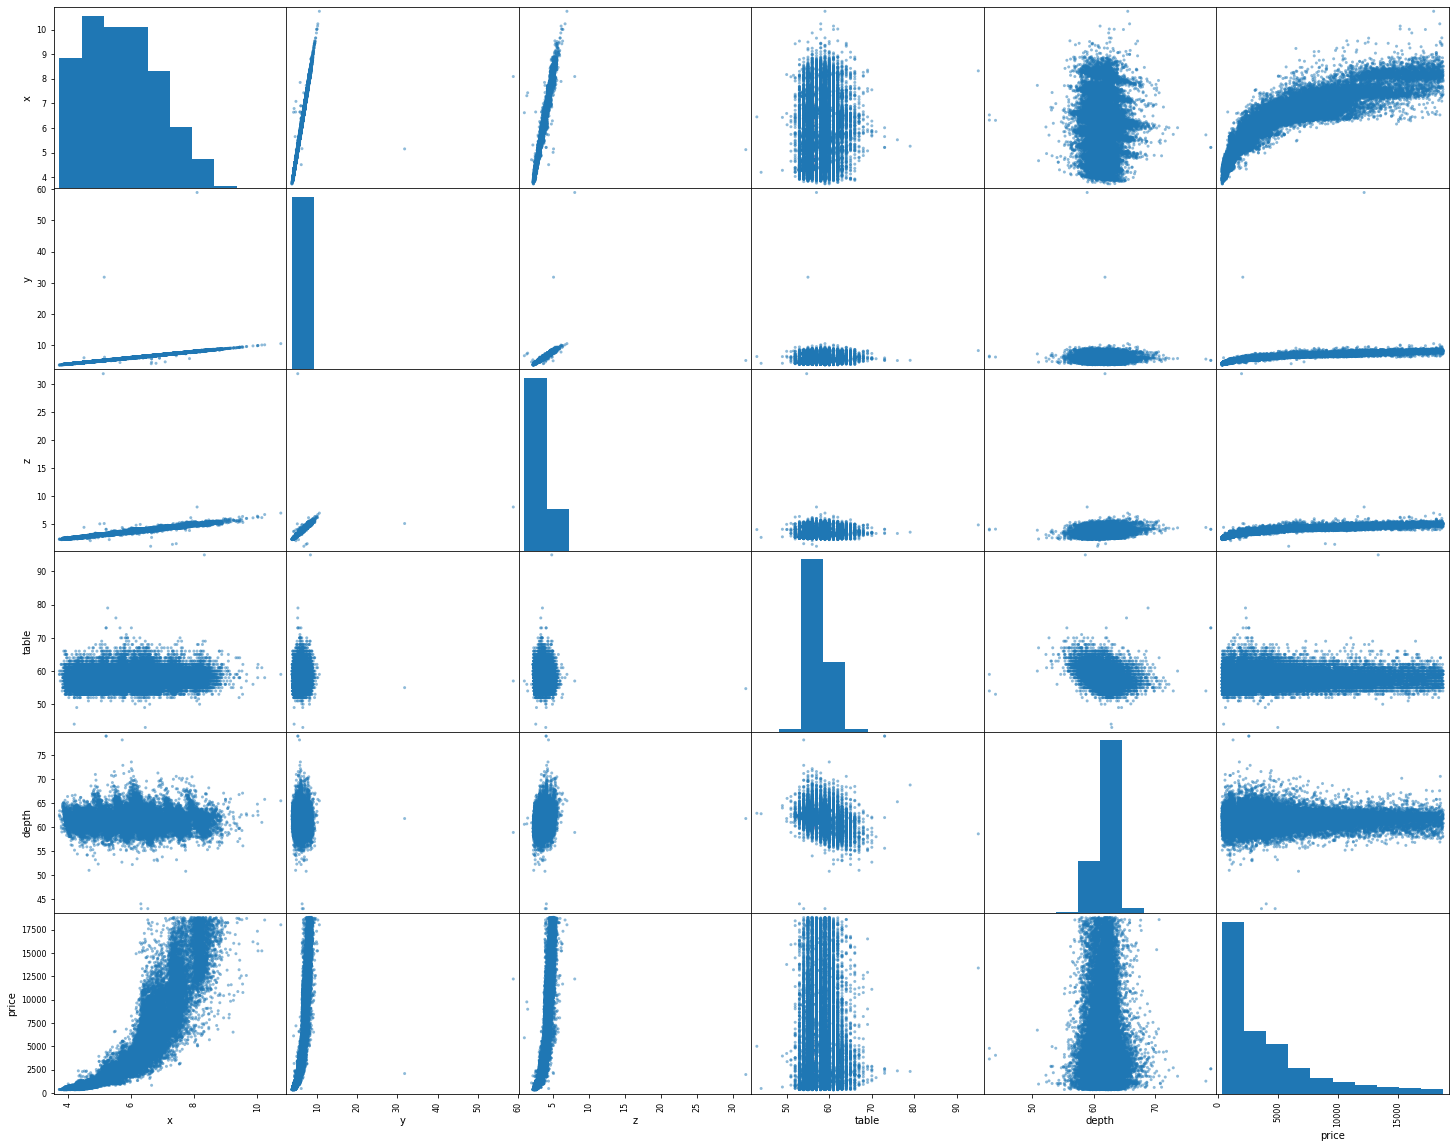

In [19]:
#overall look into scater of diamonds data - checking outliers
from pandas.plotting import scatter_matrix

attributes = ["x", "y", "z", "table", "depth", "price"]
scatter_matrix(diamondsNonNA[attributes], figsize=(25, 20))
plt.show()

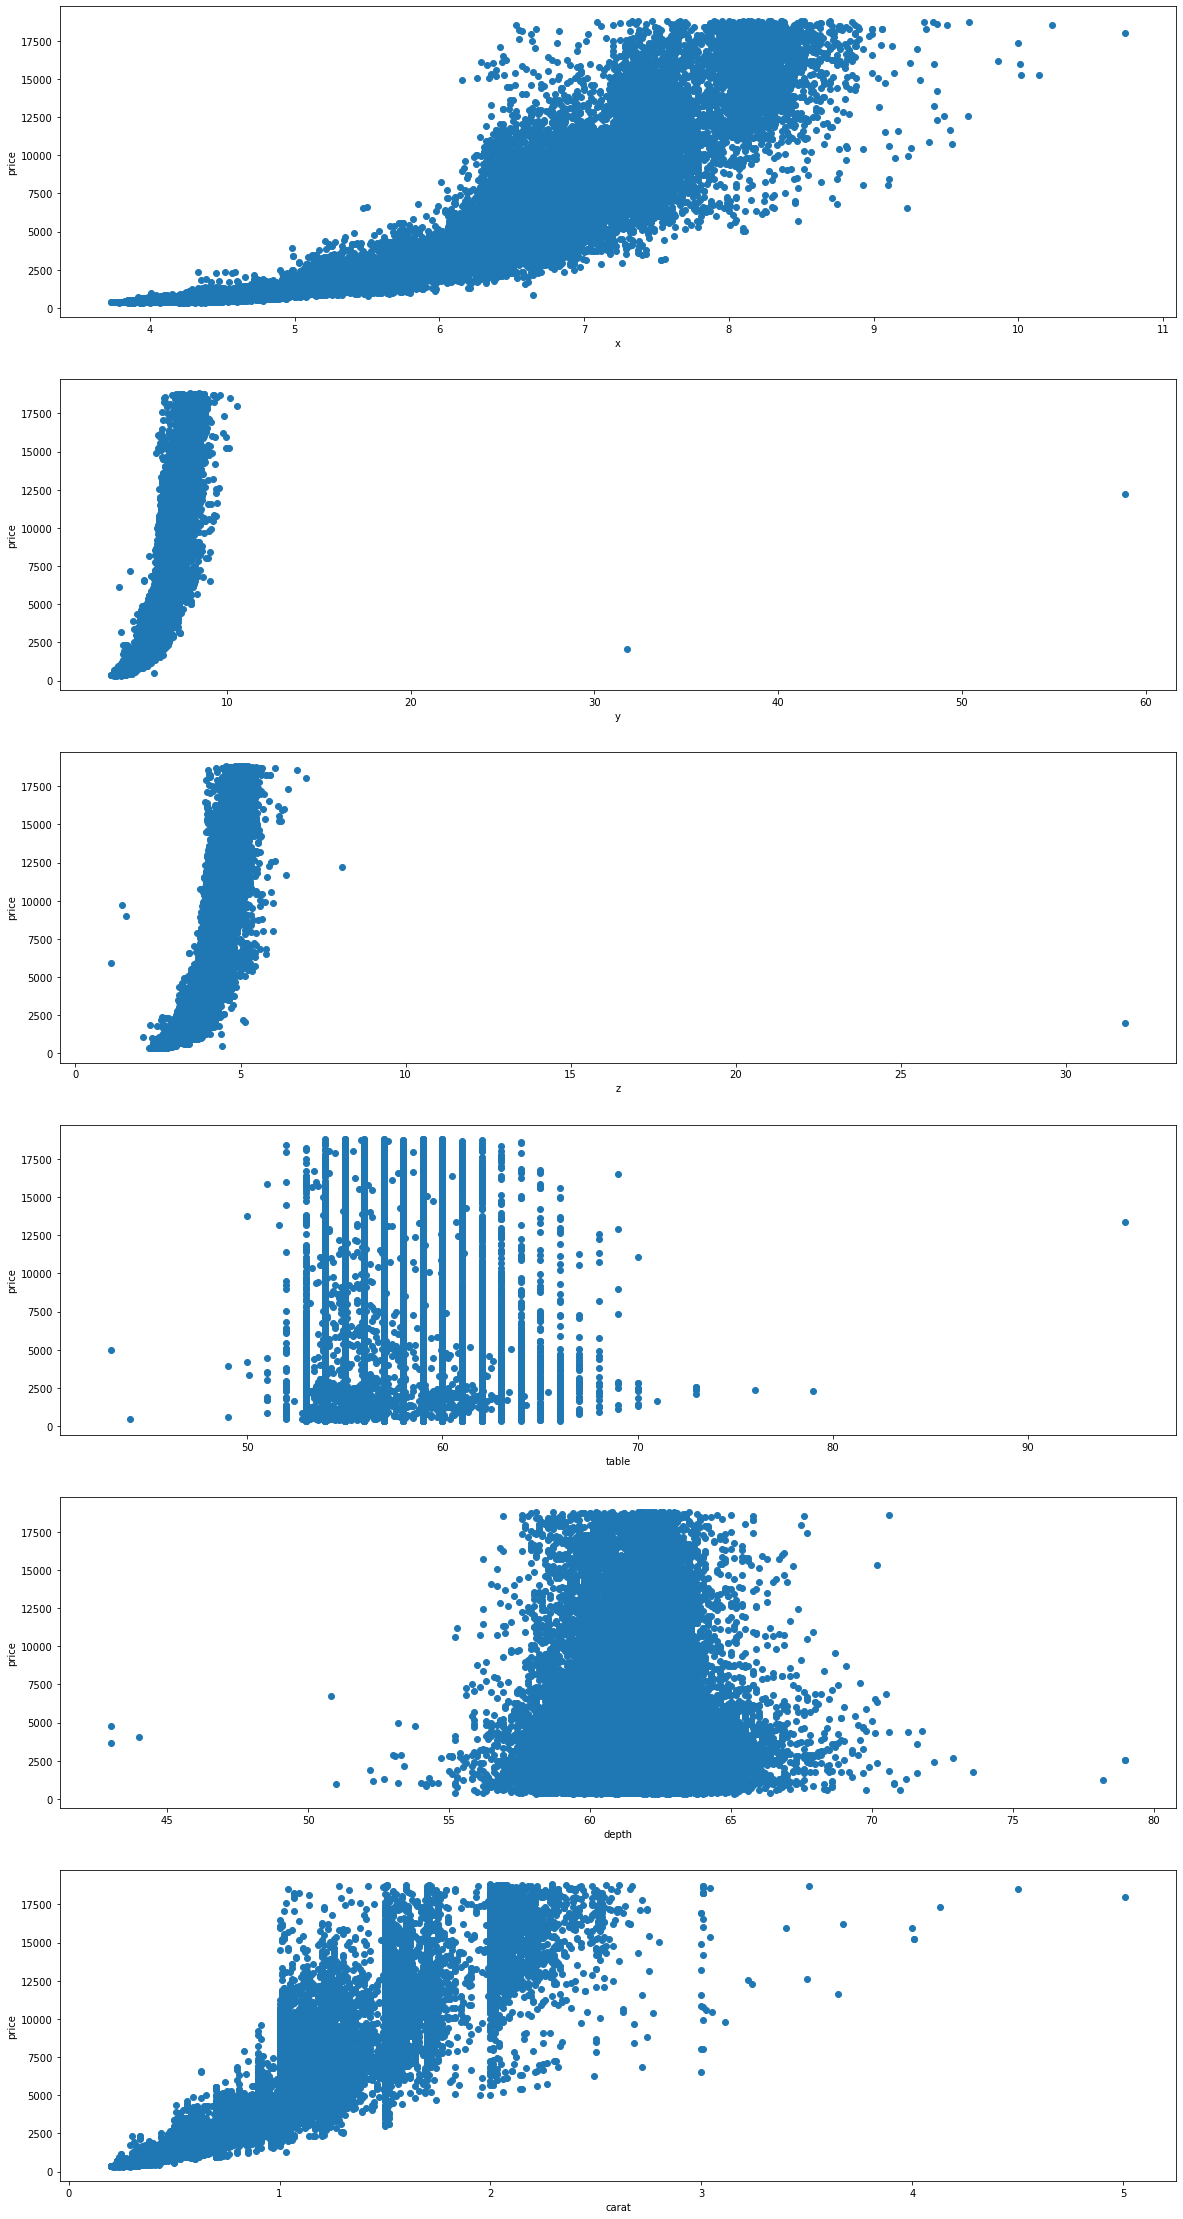

In [20]:
# Scatter plot - checking on the outliers
fig, ax = plt.subplots(6,figsize = (20,40))
attributes = ["x", "y", "z", "table", "depth","carat"]
for i in range(6):
    ax[i].scatter(diamondsNonNA[attributes[i]], diamondsNonNA['price'])
    ax[i].set_xlabel(attributes[i])
    ax[i].set_ylabel('price')

plt.show()

In [21]:
#checking rows associated with outliers detected
diamondsNonNA[(diamondsNonNA['x']>=10) | (diamondsNonNA['y']>=30) | (diamondsNonNA['z']>=10)| (diamondsNonNA['table']>=75)
              |(diamondsNonNA['depth']<=50) | (diamondsNonNA['depth']>=75)|(diamondsNonNA['carat']>=3.5)]

,carat,cut,color,clarity,depth,table,price,x,y,z
4518,1.00,Fair,G,SI1,43.0,59.0,3634,6.32,6.27,3.97
6341,1.00,Fair,G,VS2,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,Ideal,J,VS2,43.0,54.0,4778,6.53,6.55,4.12
23644,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
24328,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03
24932,2.01,Fair,F,SI1,58.6,95.0,13387,8.32,8.31,4.87
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
26444,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31


In [22]:
#removing outliers - 22 rows
diamondsNonNA= diamondsNonNA.drop(diamondsNonNA[(diamondsNonNA['x']>=10) | (diamondsNonNA['y']>=30) | (diamondsNonNA['z']>=10)
                | (diamondsNonNA['table']>=75)|(diamondsNonNA['depth']<=50) | (diamondsNonNA['depth']>=75)
                                                |(diamondsNonNA['carat']>=3.5)].index)
diamondsNonNA.describe()

,carat,depth,table,price,x,y,z
count,53895.000000,53895.000000,53895.000000,53895.000000,53895.000000,53895.000000,53895.000000
mean,0.797094,61.749198,57.454825,3928.853159,5.730854,5.732706,3.538859
std,0.471769,1.419233,2.222521,3984.211734,1.117983,1.109897,0.690596
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5321.000000,6.540000,6.540000,4.030000
max,3.400000,73.600000,73.000000,18823.000000,9.540000,9.460000,6.270000


In [23]:
#finding unique values for color column
diamondsNonNA['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [24]:
#finding unique values for cut column
diamondsNonNA['cut'].unique()

array(['Premium', 'Very Good', 'Fair', 'Good', 'Ideal'], dtype=object)

In [25]:
#finding unique values for clarity column
diamondsNonNA['clarity'].unique()

array(['SI1', 'VS2', 'VVS2', 'VVS1', 'VS1', 'SI2', 'I1', 'IF'],
      dtype=object)

In [26]:
#converting categorial values - not taking into account the order/struture in columns: color, cut and clarity
categorical_cols = ['color', 'cut', 'clarity']
#generate binary values using get_dummies
diamondsNonNA_cat_LackOfOrder = pd.get_dummies(diamondsNonNA, columns = categorical_cols)
diamondsNonNA_cat_LackOfOrder

,carat,depth,table,price,x,y,z,color_D,color_E,color_F,...,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,0.24,62.8,57.0,336,3.94,3.96,2.48,0,0,0,...,0,1,0,0,0,0,0,0,0,1
6,0.24,62.3,57.0,336,3.95,3.98,2.47,0,0,0,...,0,1,0,0,0,0,0,0,1,0
7,0.26,61.9,55.0,337,4.07,4.11,2.53,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,1,0,0,...,0,1,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [27]:
#Linear Regression prediction for unstructured data in columns: color, cut, clarity
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#assigment of dependent and independent variables
X_LackOfOrder=diamondsNonNA_cat_LackOfOrder.drop("price", axis = 1)
y_LackOfOrder=diamondsNonNA_cat_LackOfOrder['price']
#splitting data into random train and test subsets
X_train_LackOfOrder, X_test_LackOfOrder, y_train_LackOfOrder, y_test_LackOfOrder = train_test_split(X_LackOfOrder, y_LackOfOrder, test_size=0.2)
model_LackOfOrder=LinearRegression()
model_LackOfOrder.fit(X_train_LackOfOrder,y_train_LackOfOrder)
y_pred_LackOfOrder = model_LackOfOrder.predict(X_test_LackOfOrder)
y_pred_LackOfOrder


array([-2184.85376349,  8576.50823066,  5586.63369795, ...,
        4565.38015457, 11490.74689918,   477.99932433])

In [28]:
from sklearn.metrics import r2_score
r2_score(y_pred_LackOfOrder,y_test_LackOfOrder)

0.9142739721577144

In [29]:
print(model_LackOfOrder.coef_)

[12020.37038102    27.02978164   -27.942639   -1661.15649127
  1418.70437498 -1781.33700222   823.45293518   616.22079731
   560.30178241   345.21200244  -155.20595518  -638.67918825
 -1551.30237391  -500.55198778   -39.6649612    234.97326965
   197.02171025   108.22196908 -3609.19746853  1474.62501265
  -168.19783618 -1126.28592202   738.96120763   432.617245
  1161.56681279  1095.91094867]


In [30]:
print(model_LackOfOrder.intercept_)

1445.3013720416234


In [31]:
#converting categorial values - order taken into account
diamondsNonNA_cat_order = diamondsNonNA.copy()
#clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
diamondsNonNA_cat_order=diamondsNonNA_cat_order.replace(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1','IF'],[0,1,2,3,4,5,6,7])
#cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
diamondsNonNA_cat_order=diamondsNonNA_cat_order.replace(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],[0,1,2,3,4])
#color diamond colour, from J (worst) to D (best) - that might be also done by for example LabelEncoder
diamondsNonNA_cat_order=diamondsNonNA_cat_order.replace(sorted(diamondsNonNA_cat_order['color'].unique()),[0,1,2,3,4,5,6])
diamondsNonNA_cat_order

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,5,3,62.4,58.0,334,4.20,4.23,2.63
5,0.24,2,6,5,62.8,57.0,336,3.94,3.96,2.48
6,0.24,2,5,6,62.3,57.0,336,3.95,3.98,2.47
7,0.26,2,4,2,61.9,55.0,337,4.07,4.11,2.53
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,1,61.0,58.0,2757,6.15,6.12,3.74


In [32]:
#Linear Regression prediction for structured data in columns: color, cut, clarity
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#assigment of dependent and independent variables
X_order=diamondsNonNA_cat_order.drop("price", axis = 1)
y_order=diamondsNonNA_cat_order['price']
#splitting data into random train and test subsets.
X_train_order, X_test_order, y_train_order, y_test_order = train_test_split(X_order, y_order, test_size=0.2)
model_order=LinearRegression()
model_order.fit(X_train_order,y_train_order)
y_pred_order = model_order.predict(X_test_order)
y_pred_order

array([ 2494.95297011,  5212.01395789,  4324.78518257, ...,
       10512.19990889,  2914.03681784, 14674.52577517])

In [33]:
from sklearn.metrics import r2_score
r2_score(y_pred_order,y_test_order)

0.9048587641559416

In [34]:
print(model_order.coef_)

[11471.81548805   127.87329064  -328.81002479   494.13991868
    44.30378387   -20.58661138 -2039.52295911  2272.23969343
 -2211.44674118]


In [35]:
print(model_order.intercept_)

-1304.2241335760696


In [36]:
# data standariztion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


num_col=['carat','depth','table','x','y','z']

ct = ColumnTransformer([
        ('numercial data', StandardScaler(), num_col)
    ], remainder='passthrough')

diamondsNonNA_cat_LackOfOrder_stand=pd.DataFrame(ct.fit_transform(diamondsNonNA_cat_LackOfOrder))
diamondsNonNA_cat_LackOfOrder_stand

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-1.244464,-1.373429,1.595129,-1.646601,-1.705314,-1.779435,326.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1.074888,0.458564,0.245298,-1.369313,-1.353927,-1.316062,334.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.180873,0.740409,-0.204646,-1.601877,-1.597195,-1.533268,336.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.180873,0.388102,-0.204646,-1.592932,-1.579175,-1.547749,336.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.138479,0.106257,-1.104533,-1.485595,-1.462046,-1.460866,337.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53890,-0.163416,-0.668817,-0.204646,0.017126,0.024592,-0.056269,2757.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53891,-0.163416,0.951793,-1.104533,-0.036543,0.015582,0.103015,2757.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53892,-0.205810,0.740409,1.145186,-0.063377,-0.047487,0.030613,2757.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53893,0.133342,-0.527894,0.245298,0.374916,0.348949,0.291260,2757.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [37]:
#std and mean check
diamondsNonNA_cat_LackOfOrder_stand.describe().round()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
count,53895.0,53895.0,53895.0,53895.0,53895.0,53895.0,53895.0,53895.0,53895.0,53895.0,...,53895.0,53895.0,53895.0,53895.0,53895.0,53895.0,53895.0,53895.0,53895.0,53895.0
mean,0.0,-0.0,0.0,-0.0,-0.0,0.0,3929.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,3984.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-1.0,-8.0,-7.0,-2.0,-2.0,-4.0,326.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,949.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,2400.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,5321.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,6.0,8.0,7.0,3.0,3.0,4.0,18823.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [38]:
X=diamondsNonNA_cat_LackOfOrder_stand.drop([6],axis = 1)
y=diamondsNonNA_cat_LackOfOrder_stand[[6]]

#splitting data into random train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array([[ 6166.66382961],
       [12728.12239208],
       [  823.13089146],
       ...,
       [ 1200.49375252],
       [ 3602.7109687 ],
       [ 5115.37413573]])

In [39]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.912392299735264

In [40]:
print(model.coef_)

[[ 5717.8455006     48.36395331   -57.32943309 -2020.43904075
   1799.57375304 -1335.84154374   841.47882292   621.92151973
    551.30468006   343.20219959  -147.52644333  -652.98409799
  -1557.39668099  -506.79103618   -25.48972693   237.26176717
    196.29568589    98.72331005 -3586.59456766  1493.89639155
   -165.847396   -1131.08544141   745.316956     430.59081959
   1116.3364997   1097.38673823]]
